# $k$-armed bandits-Bernoulli using $\epsilon$-greedy algortihm

We have $k$ Bernoulli distributions. 
In each action, we should choose one of these Bernoulli distributions and according to it we earn $+1$ or $-1$ reward. 
Our goal is to maximize the expected rewards in longterm!
Note that these $k$ distributions are unknown to us. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
class K_ArmedBandits:
    def __init__(self, parameters, n_iter = 1, eps = 0):
        
        """
        parameters: a list of length n_arms containing success probapilities corresponding to the distributions   
        
        """
        self.n_arms = len(parameters)
        self.parameters = np.array(parameters)
        self.Q = np.zeros(self.n_arms,)
        self.denominator = np.zeros(self.n_arms,)
        self.numerator = np.zeros(self.n_arms,)
        
        reward = 0
        self.Rewards = []
        
        for i in range(n_iter):
            idx = self.Policy(eps)
            self.Q[idx] = self.numerator[idx]/self.denominator[idx]
            reward += self.Step_Reward(idx)
            self.Rewards.append(reward/(i+1))

        
    def Step_Reward(self, arm_number): 
        
        if np.random.rand() <= self.parameters[arm_number]:
            self.numerator[arm_number] += 1
            return 1
        else:
            return -1
    
    def Policy(self, eps):

        if np.random.rand() <= eps:
            idx = np.random.randint(0,self.n_arms)
            self.denominator[idx] += 1
        else:
            idx = np.random.choice(
                np.where(self.Q >= np.max(self.Q))[0]
            )

            self.denominator[idx] += 1
            
        return idx    

In [3]:
model = K_ArmedBandits([.3,.4, .25, .8, .6, .1], n_iter=100000, eps=.01)

In [4]:
model.Q

array([0.3096    , 0.49101796, 0.23316062, 0.80061581, 0.57342657,
       0.07272727])

In [5]:
model.Rewards[-1]

0.58274

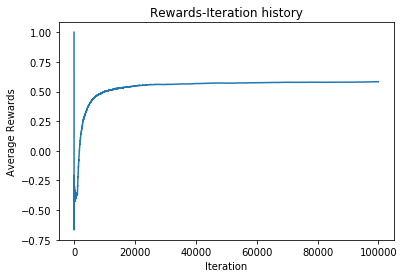

In [6]:
plt.plot(model.Rewards)
plt.xlabel('Iteration')
plt.ylabel('Average Rewards')
plt.title('Rewards-Iteration history')
plt.show()

In [7]:
List_probabilities = [.2,.3, .4, .5, .8, .01]
p_max = np.max(List_probabilities)

In [8]:
cache_1 = np.zeros(4000)
cache_2 = np.zeros(4000)
cache_3 = np.zeros(4000)
for i in range(400):
    model = K_ArmedBandits(List_probabilities, n_iter=4000, eps=.1)
    cache_1 += model.Rewards
    
    model = K_ArmedBandits(List_probabilities, n_iter=4000, eps=.01)
    cache_2 += model.Rewards
    
    model = K_ArmedBandits(List_probabilities, n_iter=4000, eps=0)
    cache_3 += model.Rewards

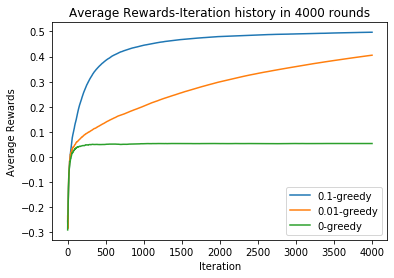

In [11]:
plt.plot(cache_1/400, label = "0.1-greedy")
plt.plot(cache_2/400, label = "0.01-greedy")
plt.plot(cache_3/400, label = "0-greedy")
plt.xlabel('Iteration')
plt.ylabel('Average Rewards')
plt.title('Average Rewards-Iteration history in 4000 rounds')
plt.legend()
plt.show()

In [10]:
print("Average Reward via 0.1-greedy algorithm: %s  the optimum expected reward: %s" %(cache_1[-1]/400, 2 * p_max -1))
print("Average Reward via 0.01-greedy algorithm: %s while the optimum expected reward is %s" %(cache_2[-1]/400, 2 * p_max -1))
print("Average Reward via 0-greedy algorithm: %s while the optimum expected reward is %s" %(cache_3[-1]/400, 2 * p_max -1))

Average Reward via 0.1-greedy algorithm: 0.4969274999999999  the optimum expected reward: 0.6000000000000001
Average Reward via 0.01-greedy algorithm: 0.40547999999999995 while the optimum expected reward is 0.6000000000000001
Average Reward via 0-greedy algorithm: 0.053937499999999965 while the optimum expected reward is 0.6000000000000001
